Day1

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1. Missing compeletly at random(MCAR)

The missing data has no relation ship of any other values or missing values in the dataset

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2. Missing data not at random(MNAR) : Systematic missing values

In [6]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
# replacing 1 for Nan values and 0 for notnull values

In [7]:
df['cabin_null'].mean() #gives percentage of null values

0.7710437710437711

In [8]:
# relation percentage b/w survived and the table column
df.groupby(['Survived']).mean()
# relation percentage b/w survived and cabin_null 
#df.groupby(['Survived'])['cabin_null'].mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.876138
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.602339


# 3. Missing at Random(MAR)

Purposefully not providing the data ex:male-salary

# All the techniques of handling Missing Values
1. Mean,Median,Mode replacement
2. Random Sample Imputation
3. Capturing NaN value with new feature
4. End of Distribution Imputation
5. Arbitary Imputation
6. Frequent category imputation


In [9]:
#Mean/Median/Mode Imputation

In [10]:
df_median=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_median.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
median=df.Age.median()  #or df['Age'].median()
median

28.0

In [12]:
def impute_median_nan(df_median,variable,median):
    df_median[variable+'_median']=df_median[variable].fillna(median)

In [13]:
impute_median_nan(df_median,'Age',median)

In [14]:
df_median.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [15]:
print(df['Age'].std())
print(df_median['Age_median'].std())

14.526497332334044
13.019696550973194


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

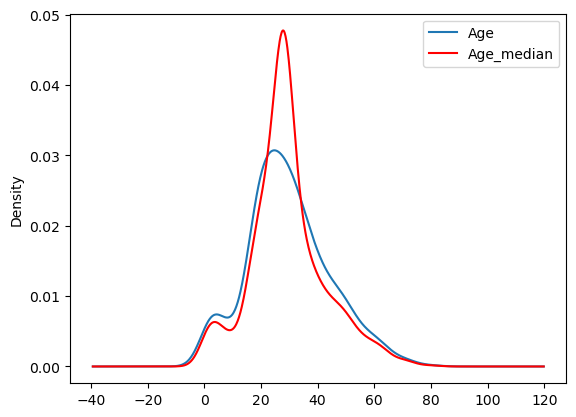

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df_median['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Day 2

# Random Sample Imputation

Taking random observation from the dataset and use this observation to replace the NaN vvalues.
This assumes that data is MCAR

In [18]:
df_random_sample=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_random_sample.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df_random_sample.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
#lets find the random "samples" to be replaced in NaN place
df_random_sample.Age.dropna().sample() #each and every time you run this you get a different output therefore to over come this we give
#condition to the sample() and set random_sample attribute to 0 as it does not change for each run

382    32.0
Name: Age, dtype: float64

In [21]:
median=df.Age.median()  #or df['Age'].median()
median

28.0

In [22]:
random_sample=df_random_sample['Age'].dropna().sample(df_random_sample["Age"].isnull().sum(),random_state=0)
#random_sample has values to store in na place 
# id=f random state is not written the values keeps changing for every execution
#it is replacing all the null values with sampled values
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
random_sample.index=df_random_sample[df_random_sample['Age'].isnull()].index
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [24]:
df_random_sample.head(540)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
535,1,7.0,26.2500
536,0,45.0,26.5500
537,1,30.0,106.4250
538,0,NaN,14.5000


In [25]:
def impute_random_sample_nan(df_median,variable,median):
        df_random_sample[variable+'_median']=df_random_sample[variable].fillna(median)
        df_random_sample[variable+'_random']=df_random_sample[variable]
        df_random_sample.loc[df_random_sample[variable].isnull(),variable+'_random']=random_sample

In [26]:
impute_random_sample_nan(df_random_sample,'Age',median)

In [27]:
df_random_sample.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


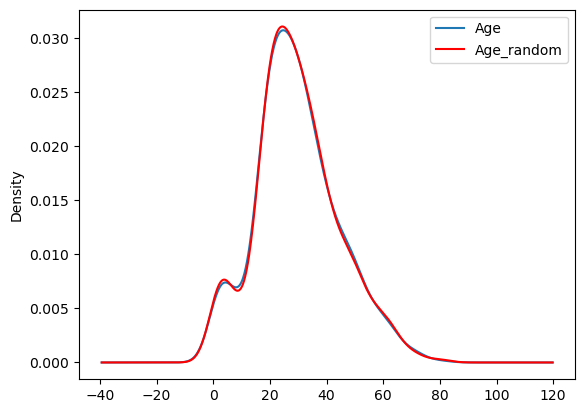

In [28]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df_random_sample['Age_random'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Capturing NaN with a new feature

This works well if data is not MCAR

In [29]:
df_some_feature=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df_some_feature.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df_some_feature['Age_Nan']=np.where(df_some_feature['Age'].isnull(),1,0)

In [31]:
df_some_feature

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


# End of Distribution Imputation

In this processwe take a point or value which is in the end of the distribution as the value to fillna
i.e we take the point after the 3rd Std distribution in the normal distribution

in case we have many outliers it is handeled successfully in this process



In [32]:
df_end_distribution=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

<AxesSubplot:>

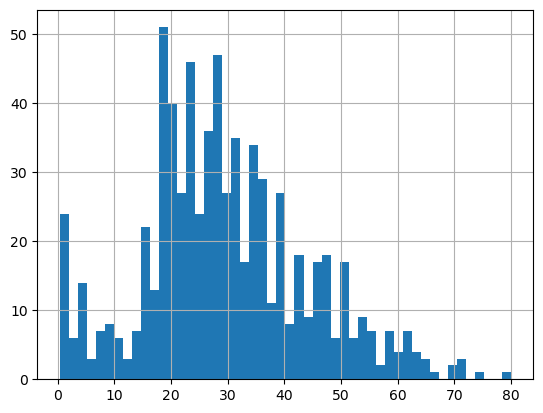

In [33]:
df_end_distribution.Age.hist(bins=50) #we pick the values in the end of distribution

In [34]:
extreme=df_end_distribution['Age'].mean()+3*df_end_distribution['Age'].std()
# this is the value of the 3rd normal distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

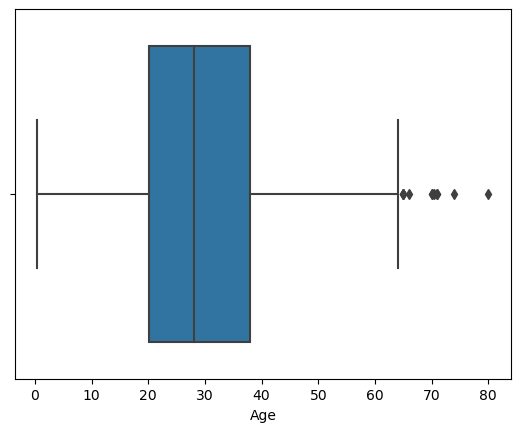

In [35]:
import seaborn as sns
sns.boxplot('Age',data=df_end_distribution)
# it has manay outliers

In [36]:
def impute_end_distribution_nan(df_end_distribution,variable,median,extreme):
        df_end_distribution[variable+'_end_distribution']=df_end_distribution[variable].fillna(extreme)
        df_end_distribution[variable].fillna(median,inplace=True)

In [37]:
impute_end_distribution_nan(df_end_distribution,'Age',median,extreme)

In [38]:
df_end_distribution

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

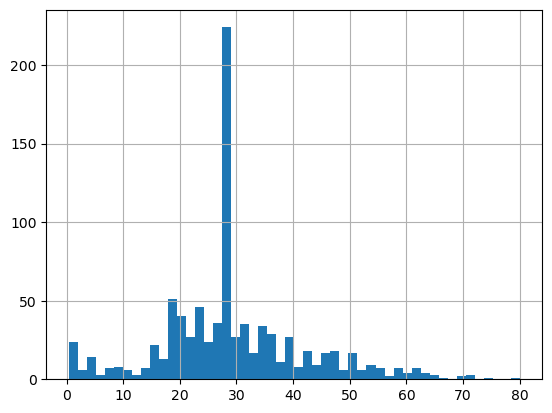

In [39]:
df_end_distribution.Age.hist(bins=50) #the varience is in the middle if replaced by median of distribution

<AxesSubplot:>

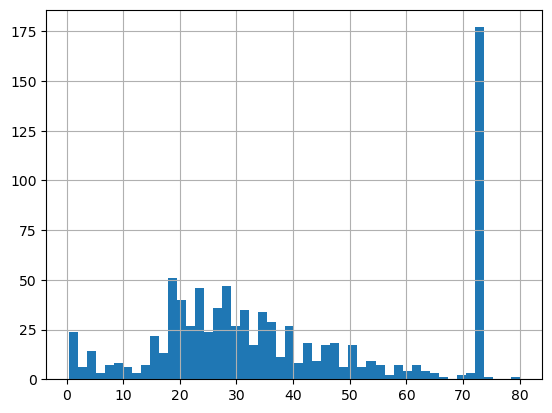

In [40]:
df_end_distribution.Age_end_distribution.hist(bins=50)#the varience is in the end of distribution when replaced by 3 StdDiv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

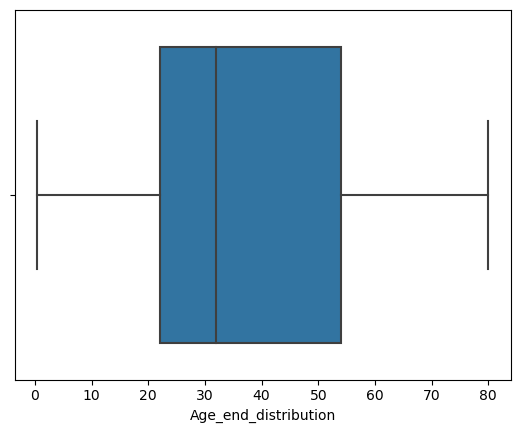

In [41]:
sns.boxplot('Age_end_distribution',data=df_end_distribution)
# outliers are captured by end of distribution method 

Day 3

# Arbitary Value Imputation

consists of replacing NaN by arbitary value(not a normal variable as mean median mode or extreme)
It was derived by Kaggel
arbitary value is some derived value

In [42]:
df_arbitary=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [43]:
def impute_arbitary_nan(df_arbitary,variable):
    df_arbitary[variable+'_zero']=df_arbitary[variable].fillna(0)
    df_arbitary[variable+'_hunderd']=df_arbitary[variable].fillna(100)

# Arbitary Values Properties
random choice 
It should not be the value more frequently present
We take one value of Outlires maybe last or least outlier value
It is used to find the importance of NaN

In [44]:
impute_arbitary_nan(df_arbitary,'Age')
df_arbitary.head(10)

,Survived,Age,Fare,Age_zero,Age_hunderd
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


### Missing Values in Categorical Features

# Frequent Categorical Imputation

In [45]:
import pandas as pd
df=pd.read_csv('loan.csv')

In [46]:
df.isnull().sum().head()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
dtype: int64

In [47]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
df_freq_cat=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [49]:
df_freq_cat.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
df_freq_cat.isnull().sum() # getting no of missing values (for % use .mean())

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [51]:
df_freq_cat.isnull().mean().sort_values(ascending=True)

# as there are less no of missing values in 2 column we can replace it by most frequent feature value

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

Compute freq of occurence of the value with the each categorical feature

In [52]:
 df_freq_cat.groupby(['BsmtQual'])['BsmtQual'].count()  #or df_freq_cat['BsmtQual'].valuecounts()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

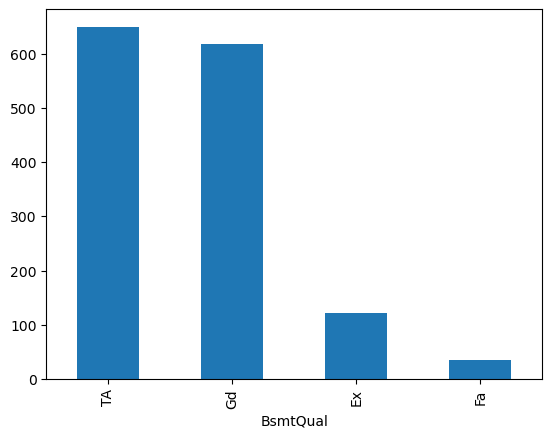

In [53]:
df_freq_cat.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()
# we replace the NaN values by TA value

In [54]:
df_freq_cat['FireplaceQu'].value_counts()
# we replace with Gd

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='GarageType'>

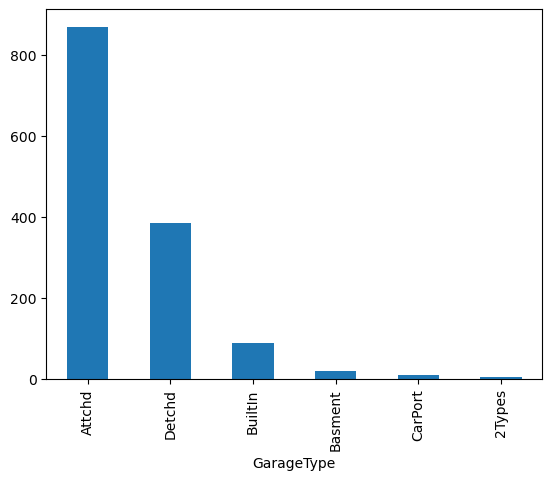

In [55]:
df_freq_cat.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()
# we replace with Attchd

In [56]:
df_freq_cat['FireplaceQu'].value_counts()   # or df_freq_cat['FireplaceQu'].mode()[0 ]

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [57]:
def impute_ferq_category_nan(df_freq_cat,variable):
    most_frequent_category=df_freq_cat[variable].value_counts().index[0]
    df_freq_cat[variable].fillna(most_frequent_category,inplace=True)

In [58]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_ferq_category_nan(df_freq_cat,feature)

In [59]:
df_freq_cat.isnull().mean()
# as all the null values are replaced we get  the mean as 0 as no NaN values

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Adding a Variable to Capture NaN

In [60]:
df_adding_var=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [61]:
frequent=df_adding_var['BsmtQual'].mode()[0]

In [62]:
import numpy as np
df_adding_var['BsmtQual_var']=np.where(df_adding_var['BsmtQual'].isnull(),1,0)

In [63]:
df_adding_var['BsmtQual'].fillna(frequent,inplace=True)

In [64]:
df_adding_var.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [65]:
df_adding_var['FireplaceQu_Var']=np.where(df_adding_var['FireplaceQu'].isnull(),1,0)
frequent=df_adding_var['BsmtQual'].mode()[0]
df_adding_var['FireplaceQu'].fillna(frequent,inplace=True)
df_adding_var.head()
# we do this method for the feature which has more/most number of NaN values in it so thet the importance is recorded
# DisAdv: The features increases

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_Var
0,Gd,TA,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose we have most frequent categories we replace the NaN values with the New Category 

In [66]:
df_replace_newcategory=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df_replace_newcategory.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [67]:
def impute_newcategory_replace_nan(df_replace_newcategory,variable):
    df_replace_newcategory[variable+'_newcat']=np.where(df_replace_newcategory[variable].isnull(),"Missing",df_replace_newcategory[variable])

In [68]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_newcategory_replace_nan(df_replace_newcategory,feature)

In [69]:
df_replace_newcategory.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newcat,FireplaceQu_newcat,GarageType_newcat
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [70]:
df_replace_newcategory.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_newcat,FireplaceQu_newcat,GarageType_newcat
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
